### Problem statement we want to predict that airline customer will loyal or disloyal

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.metrics import  confusion_matrix,classification_report

In [2]:
df = pd.read_csv('cust_satisfaction.csv')
df.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0


In [7]:
df['Gender'] = df['Gender'].map({'Male':1,'Female':0})
df['Customer Type'] = df['Customer Type'].map({'Loyal Customer':1,'disloyal Customer':0})
df['Type of Travel'] = df['Type of Travel'].map({'Business travel':1,'Personal Travel':0})
df['Class'] = df['Class'].map({'Business':1,'Eco':2,'Eco Plus':3})
df['satisfaction'] = df['satisfaction'].map({'neutral or dissatisfied':0,'satisfied':1})


In [9]:
df.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,1,0,3,0,13,460,5,4,5,25,18.0
1,1,0,1,1,0,25,235,1,3,1,1,6.0
2,0,1,1,1,1,26,1142,5,4,5,0,0.0
3,0,1,1,1,0,25,562,2,3,2,11,9.0
4,1,1,1,1,1,61,214,3,4,3,0,0.0


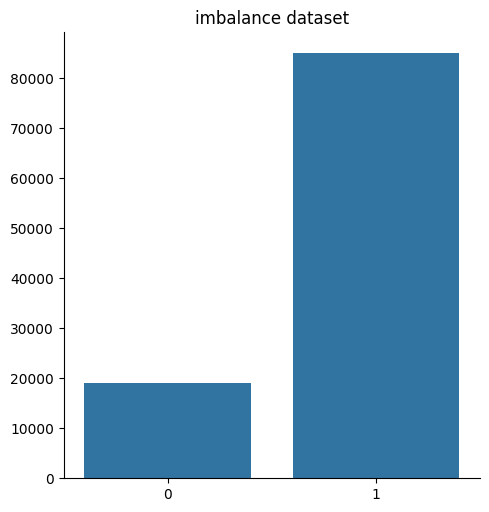

In [22]:
sns.catplot(x = list((df['Customer Type'].value_counts().keys())),y=list((df['Customer Type'].value_counts().values)),kind='bar')
plt.title('imbalance dataset')
plt.show()

In [29]:
loyal_customer = df[df['Customer Type']==1].loc[0:20000]
disloyal_customer = df[df['Customer Type']==0]

In [36]:
balance_df = pd.concat([loyal_customer,disloyal_customer])

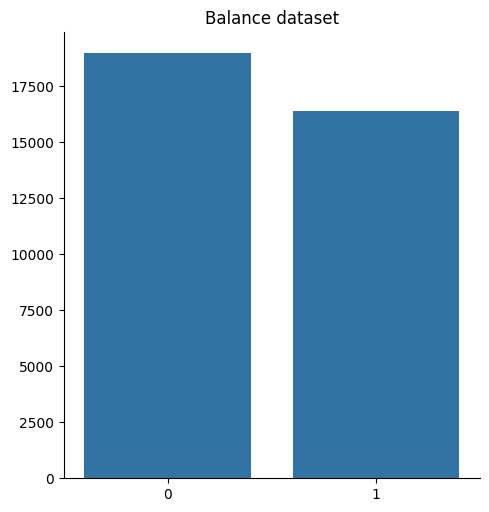

In [60]:
sns.catplot(x = list((balance_df['Customer Type'].value_counts().keys())),y=list((balance_df['Customer Type'].value_counts().values)),kind='bar')
plt.title('Balance dataset')
plt.show()

In [37]:
balance_df.isnull().sum()

Gender                         0
Customer Type                  0
Type of Travel                 0
Class                          0
satisfaction                   0
Age                            0
Flight Distance                0
Inflight entertainment         0
Baggage handling               0
Cleanliness                    0
Departure Delay in Minutes     0
Arrival Delay in Minutes      94
dtype: int64

In [44]:
null_df = balance_df[balance_df.isnull()['Arrival Delay in Minutes']]
null_df.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
213,0,1,1,2,1,38,109,5,4,5,31,NaN
1124,1,1,0,2,0,53,1012,4,4,4,38,NaN
1529,1,1,1,1,0,39,733,2,2,3,11,NaN
2108,0,1,0,2,0,24,417,5,2,5,1,NaN
2485,0,1,0,2,1,28,2370,3,4,3,3,NaN


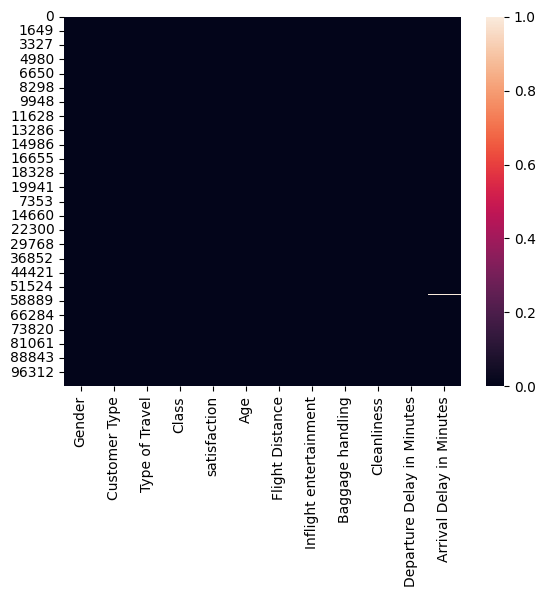

In [51]:
sns.heatmap(balance_df.isnull())
plt.show()
# to visualaize the represenatation of missing value

In [53]:
balance_df.dropna().isnull().sum()
## null free data

Gender                        0
Customer Type                 0
Type of Travel                0
Class                         0
satisfaction                  0
Age                           0
Flight Distance               0
Inflight entertainment        0
Baggage handling              0
Cleanliness                   0
Departure Delay in Minutes    0
Arrival Delay in Minutes      0
dtype: int64

In [54]:
null_free_df = balance_df.dropna()

In [55]:
x = null_free_df.drop('Customer Type',axis=1)
y = null_free_df[['Customer Type']]

In [56]:
x.shape ,y.shape

((35269, 11), (35269, 1))

In [58]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [57]:
lg = LogisticRegression()

In [61]:
lg.fit(x_train,y_train)

c:\Users\Ranjit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Ranjit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [62]:
lg.score(x_train,y_train)
lg.score(x_test,y_test)


0.851431811738021

In [65]:
y_pred = lg.predict(x_test)

In [66]:
confusion_matrix(y_test,y_pred)

array([[3388,  391],
       [ 657, 2618]], dtype=int64)

<Axes: >

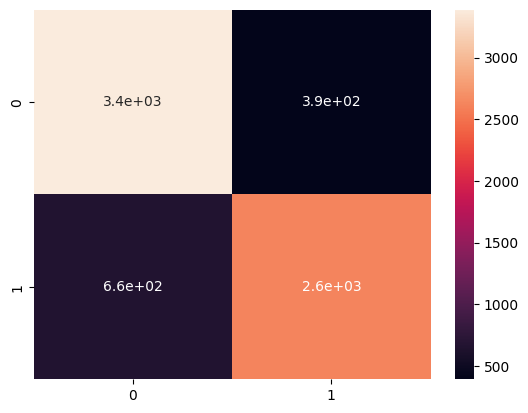

In [68]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [70]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      3779
           1       0.87      0.80      0.83      3275

    accuracy                           0.85      7054
   macro avg       0.85      0.85      0.85      7054
weighted avg       0.85      0.85      0.85      7054



### Thank You